In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing/ Cleaning :

In [125]:
path = "/content/drive/MyDrive/Sampled_data.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,...,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,0,0,01-01-01-203408001402010,2010,1,1,1,MHNB030001842010,chief judicial magistrate,0 male,...,-9999,-9999,4400,3734.0,19,2010-02-23,2010-02-23,2010-02-23,2010-02-23,2010-02-23
1,1,1,01-01-01-203408003852010,2010,1,1,1,MHNB030005702010,chief judicial magistrate,0 male,...,-9998,0,4400,3280.0,30,2010-06-17,2013-10-17,2010-07-17,2013-10-03,2013-10-17
2,2,2,01-01-01-203408004512010,2010,1,1,1,MHNB030006852010,chief judicial magistrate,0 male,...,-9999,-9998,4400,4834.0,22,2010-07-08,2014-09-16,2010-07-21,2014-08-19,2014-09-16
3,3,3,01-01-01-203408005632010,2010,1,1,1,MHNB030008512010,chief judicial magistrate,0 male,...,0,0,4400,3280.0,4,2010-08-18,2015-01-02,2010-09-06,2014-12-16,2015-01-02
4,4,4,01-01-01-203408007652010,2010,1,1,1,MHNB030010672010,chief judicial magistrate,0 male,...,0,0,4400,3439.0,25,2010-11-12,2013-11-22,2010-12-01,2013-10-25,2013-11-22


In [126]:
df.head()
df.drop(df.columns[[0,1,7]], axis=1, inplace=True)


column 0 & 1 : unnamed , column 7 : Cino (unique)


In [127]:
df.head()

,ddl_case_id,year,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-203408001402010,2010,1,1,1,chief judicial magistrate,0 male,-9998 unclear,-9999,-9999,4400,3734.0,19,2010-02-23,2010-02-23,2010-02-23,2010-02-23,2010-02-23
1,01-01-01-203408003852010,2010,1,1,1,chief judicial magistrate,0 male,-9998 unclear,-9998,0,4400,3280.0,30,2010-06-17,2013-10-17,2010-07-17,2013-10-03,2013-10-17
2,01-01-01-203408004512010,2010,1,1,1,chief judicial magistrate,0 male,0 male,-9999,-9998,4400,4834.0,22,2010-07-08,2014-09-16,2010-07-21,2014-08-19,2014-09-16
3,01-01-01-203408005632010,2010,1,1,1,chief judicial magistrate,0 male,-9998 unclear,0,0,4400,3280.0,4,2010-08-18,2015-01-02,2010-09-06,2014-12-16,2015-01-02
4,01-01-01-203408007652010,2010,1,1,1,chief judicial magistrate,0 male,-9998 unclear,0,0,4400,3439.0,25,2010-11-12,2013-11-22,2010-12-01,2013-10-25,2013-11-22


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265000 entries, 0 to 264999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ddl_case_id        265000 non-null  object 
 1   year               265000 non-null  int64  
 2   state_code         265000 non-null  int64  
 3   dist_code          265000 non-null  int64  
 4   court_no           265000 non-null  int64  
 5   judge_position     265000 non-null  object 
 6   female_defendant   265000 non-null  object 
 7   female_petitioner  265000 non-null  object 
 8   female_adv_def     265000 non-null  int64  
 9   female_adv_pet     265000 non-null  int64  
 10  type_name          265000 non-null  int64  
 11  purpose_name       256162 non-null  float64
 12  disp_name          265000 non-null  int64  
 13  date_of_filing     265000 non-null  object 
 14  date_of_decision   200528 non-null  object 
 15  date_first_list    254504 non-null  object 
 16  da

In [129]:
df.shape

(265000, 18)

In [130]:
df.isna().sum()

ddl_case_id              0
year                     0
state_code               0
dist_code                0
court_no                 0
judge_position           0
female_defendant         0
female_petitioner        0
female_adv_def           0
female_adv_pet           0
type_name                0
purpose_name          8838
disp_name                0
date_of_filing           0
date_of_decision     64472
date_first_list      10496
date_last_list        1822
date_next_list        6332
dtype: int64

In [131]:
df['female_defendant'] = df['female_defendant'].replace(['-9998 unclear'], '2')
df['female_defendant'] = df['female_defendant'].replace(['-9999 missing name'], '-9999')
df['female_defendant'] = df['female_defendant'].replace(['0 male'], '0')
df['female_defendant'] = df['female_defendant'].replace(['1 female'], '1')
df['female_petitioner'] = df['female_petitioner'].replace(['-9998 unclear'], '2')
df['female_petitioner'] = df['female_petitioner'].replace(['-9999 missing name'], '-9999')
df['female_petitioner'] = df['female_petitioner'].replace(['0 male'], '0')
df['female_petitioner'] = df['female_petitioner'].replace(['1 female'], '1')
df['female_adv_def'] = df['female_adv_def'].replace([-9998], '2')
df['female_adv_pet'] = df['female_adv_pet'].replace([-9998], '2')

In [132]:
df_state=pd.read_csv('/content/drive/MyDrive/cases_state_key.csv')
df_state[['state_code', 'state_name']]


,state_code,state_name
0,2,Andhra Pradesh
1,2,Andhra Pradesh
2,29,Telangana
3,29,Telangana
4,2,Andhra Pradesh
...,...,...
282,16,West Bengal
283,16,West Bengal
284,16,West Bengal
285,16,West Bengal


In [133]:
df=pd.merge(df, df_state[['state_code', 'state_name']], on='state_code', how='left')


In [134]:
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265000 entries, 0 to 2384991
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ddl_case_id        265000 non-null  object 
 1   year               265000 non-null  int64  
 2   state_code         265000 non-null  int64  
 3   dist_code          265000 non-null  int64  
 4   court_no           265000 non-null  int64  
 5   judge_position     265000 non-null  object 
 6   female_defendant   265000 non-null  object 
 7   female_petitioner  265000 non-null  object 
 8   female_adv_def     265000 non-null  object 
 9   female_adv_pet     265000 non-null  object 
 10  type_name          265000 non-null  int64  
 11  purpose_name       256162 non-null  float64
 12  disp_name          265000 non-null  int64  
 13  date_of_filing     265000 non-null  object 
 14  date_of_decision   200528 non-null  object 
 15  date_first_list    254504 non-null  object 
 16  d

In [135]:
df=df[~((df['date_of_decision']<'2010-01-01') | (df['date_of_decision']>'2022-01-01'))]

In [136]:
df=df[~((df['date_first_list']<'2010-01-01') | (df['date_first_list']>'2022-01-01'))]
df=df[~((df['date_last_list']<'2010-01-01') | (df['date_last_list']>'2022-01-01'))]

In [137]:
df['date_of_filing']=pd.to_datetime(df['date_of_filing'])
df['date_of_decision']=pd.to_datetime(df['date_of_decision'])
df['date_first_list']=pd.to_datetime(df['date_first_list'])
df['date_last_list']=pd.to_datetime(df['date_last_list'])


# Analysis :

In [138]:
df.year.value_counts()

2016    34491
2017    34046
2018    33886
2015    29665
2013    29639
2014    29632
2012    29444
2011    19428
2010    19352
Name: year, dtype: int64

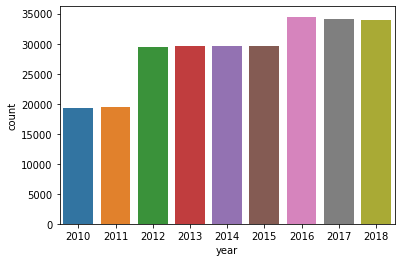

In [139]:
y_chart=sns.countplot(x=df.year)

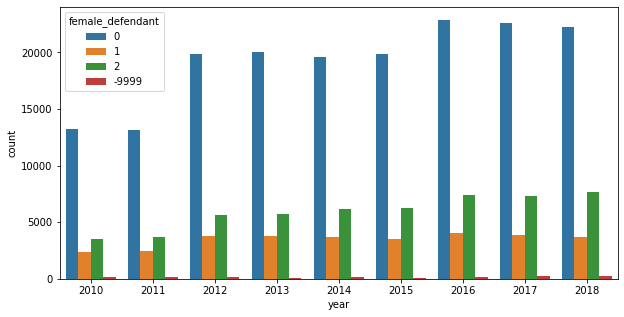

In [140]:
fig, ax = plt.subplots(figsize=(10, 5)) # fixing size of plot
f_d_year=sns.countplot(x ='year', hue ='female_defendant', data = df,ax=ax)

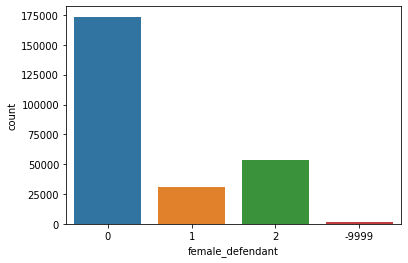

In [141]:
f_d_c=sns.countplot(x=df.female_defendant)

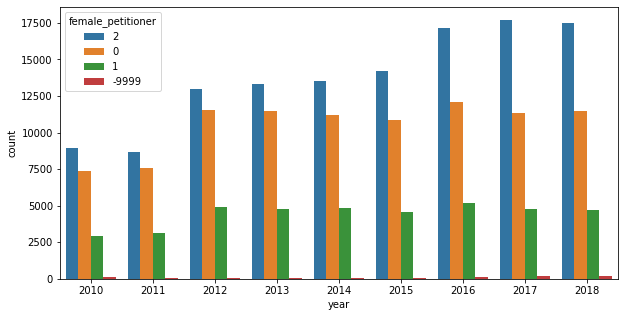

In [142]:
 fig, ax = plt.subplots(figsize=(10, 5)) # fixing size of plot
f_p_year=sns.countplot(x ='year', hue ='female_petitioner', data = df,ax=ax)

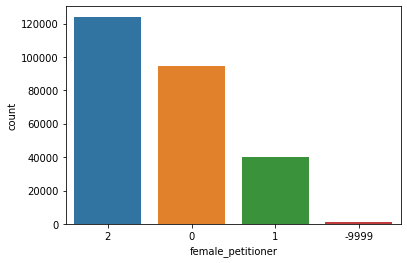

In [143]:
f_p=sns.countplot(x=df.female_petitioner)

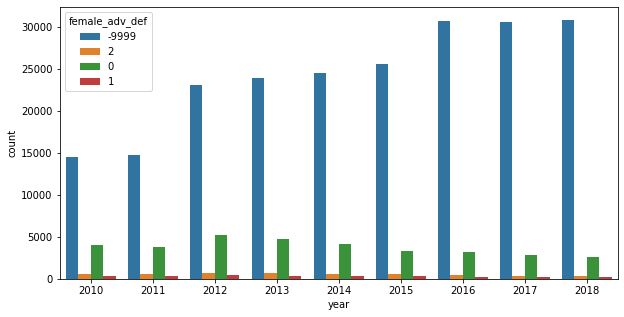

In [144]:
 fig, ax = plt.subplots(figsize=(10, 5)) # fixing size of plot
f_advd_year=sns.countplot(x ='year', hue ='female_adv_def', data = df,ax=ax)

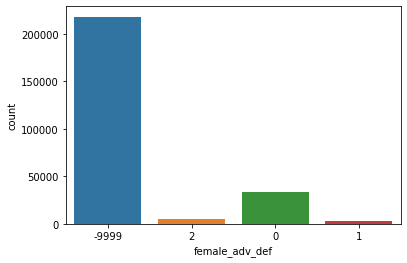

In [145]:
f_a_d=sns.countplot(x=df.female_adv_def)

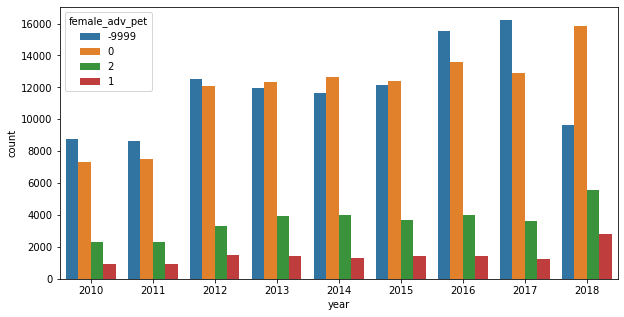

In [146]:
fig, ax = plt.subplots(figsize=(10, 5)) # fixing size of plot
f_advp_year=sns.countplot(x ='year', hue ='female_adv_pet', data = df,ax=ax)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


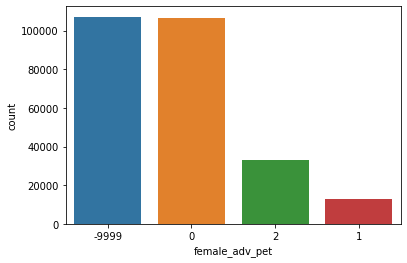

In [147]:
sns.countplot(df.female_adv_pet)

# Statewise Case Distribution 

In [148]:
df.state_name.value_counts()

Uttar Pradesh        41822
Maharashtra          33782
Karnataka            26550
Gujarat              17449
Madhya Pradesh       17083
Kerala               15184
Rajasthan            13966
Tamil Nadu           11558
Haryana              11277
Punjab                9980
Bihar                 9707
West Bengal           8273
Andhra Pradesh        6865
Delhi                 6214
Telangana             5196
Orissa                5151
Assam                 3892
Jharkhand             3341
Chhattisgarh          3161
Himachal Pradesh      2932
Uttarakhand           2484
Jammu and Kashmir     1216
Goa                    847
Chandigarh             746
Tripura                357
Manipur                219
Meghalaya              118
Sikkim                 105
Mizoram                 40
Diu and Daman           34
DNH at Silvasa          33
Ladakh                   1
Name: state_name, dtype: int64

In [149]:
s_name=df.state_name.value_counts().index
s_val=df.state_name.value_counts().values

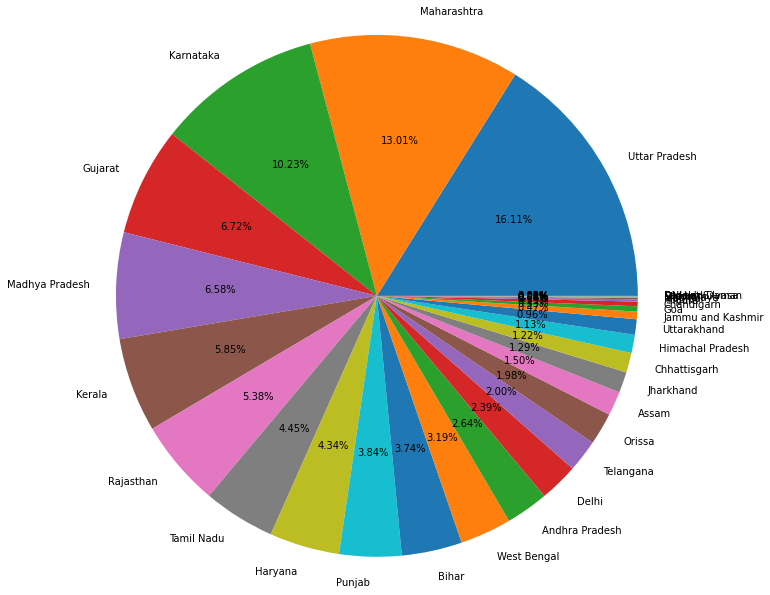

In [150]:
#pie chart for state on the basis of no. of cases
pie_chart=plt.pie(s_val,labels=s_name,autopct='%1.2f%%',radius = 3)

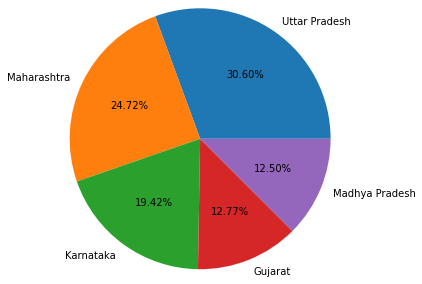

In [151]:
#top 5
pie_chart_5=plt.pie(s_val[ :5],labels=s_name[ :5],autopct='%1.2f%%',radius = 1.5)

In [152]:
#cross_tab_data=pd.crosstab(df.state_name,df.year)
#print(cross_tab_data)
#for showing % value 
s_y=pd.crosstab(df.state_name,df.year,).apply(lambda c:c/c.sum()*100,axis=1).round(decimals=2)
s_y
							


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
state_name,,,,,,,,,
Andhra Pradesh,8.11,8.70,12.32,11.16,12.24,11.22,12.47,11.86,11.93
Assam,5.58,6.53,10.59,12.15,11.02,12.62,12.49,14.93,14.11
Bihar,6.63,6.58,10.31,11.66,13.18,11.05,12.06,13.10,15.41
Chandigarh,6.17,8.85,11.80,11.26,13.27,11.26,11.39,12.47,13.54
Chhattisgarh,1.58,4.21,10.85,7.88,13.76,12.56,17.30,14.65,17.21
DNH at Silvasa,6.06,0.00,6.06,24.24,21.21,6.06,12.12,18.18,6.06
Delhi,7.31,6.49,8.50,9.06,8.95,10.25,15.26,17.24,16.96
Diu and Daman,2.94,0.00,17.65,11.76,8.82,17.65,8.82,8.82,23.53
Goa,11.33,7.56,11.81,13.58,10.63,11.45,12.63,9.33,11.69


**OBSERVATION**

> Cases registration are highest in **Uttar Pradesh**,**Maharashtra**,**Karnataka**,**Gujarat**,**Madhya Pradesh**.

>All these 5 states jointly contributes more than **50%** in total case registered from 2010-2018. 

> We can conclude that these states have high crime rate and people are aware in filing cases.



> **Himachal**, **UP**, **jharkhand**, **Bihar** show more increase in registered case in recent years shows increasing awareness about laws in these states.							



# Statewise Gender Bias case Analysis

In [153]:
#female_def=pd.crosstab(df.state_name,df.female_defendant)
#print(female_def)
#for showing % value 
f_def=pd.crosstab(df.state_name,df.female_defendant).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
(f_def)

female_defendant,-9999,0,1,2
state_name,,,,
Andhra Pradesh,0.31,46.54,34.73,18.43
Assam,3.93,69.78,12.15,14.13
Bihar,0.25,68.15,8.94,22.66
Chandigarh,0.27,65.28,11.26,23.19
Chhattisgarh,0.09,75.01,10.12,14.77
DNH at Silvasa,0.00,57.58,12.12,30.30
Delhi,0.02,65.80,12.28,21.90
Diu and Daman,0.00,44.12,5.88,50.00
Goa,4.96,60.21,12.40,22.43


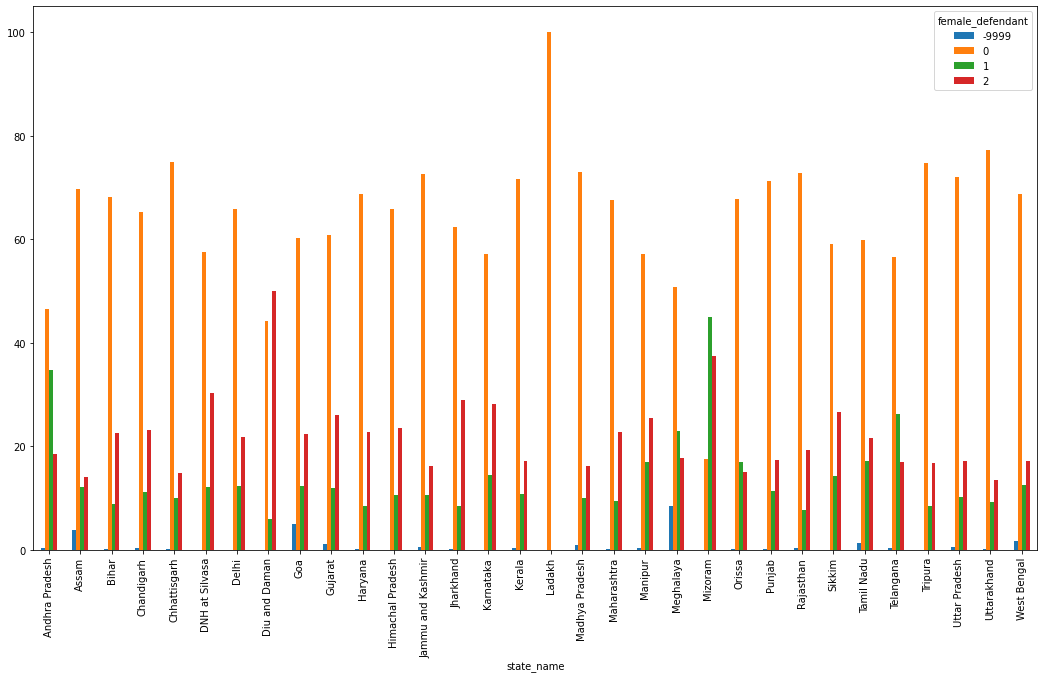

In [154]:
f_def.plot.bar(figsize=(18,10))

In [155]:
#female_adv_def=pd.crosstab(df.state_name,df.female_adv_def)
#print(female_adv_def)
#for showing % value 
f_adv_def=pd.crosstab(df.state_name,df.female_adv_def).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
f_adv_def

female_adv_def,-9999,0,1,2
state_name,,,,
Andhra Pradesh,71.68,20.41,2.84,5.07
Assam,92.01,6.12,0.69,1.18
Bihar,88.42,10.09,0.86,0.64
Chandigarh,94.37,4.69,0.67,0.27
Chhattisgarh,79.66,18.25,1.04,1.04
DNH at Silvasa,45.45,36.36,0.00,18.18
Delhi,98.37,1.40,0.13,0.10
Diu and Daman,58.82,26.47,5.88,8.82
Goa,91.26,7.44,0.35,0.94


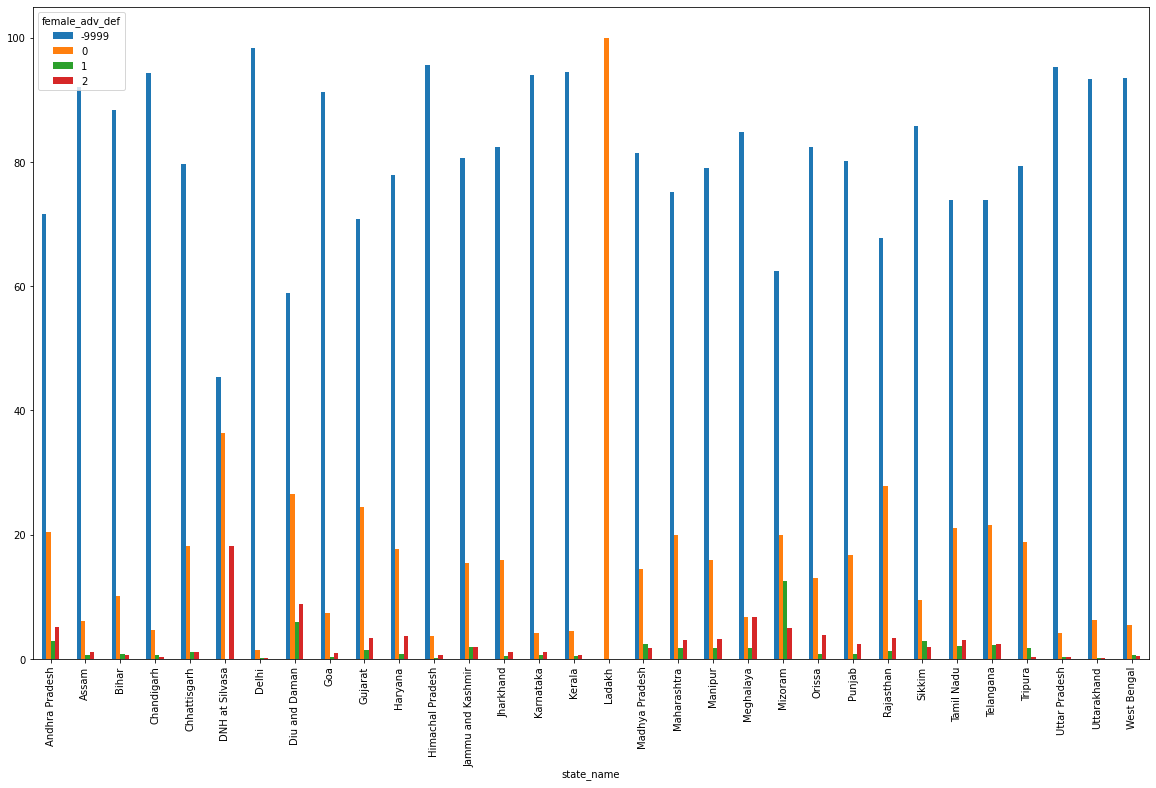

In [156]:
f_adv_def.plot.bar(figsize=(20,12))

In [157]:
#female_pet=pd.crosstab(df.state_name,df.female_petitioner)
#print(female_pet)
#for showing % value 
f_pet=pd.crosstab(df.state_name,df.female_petitioner).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
print(f_pet)

female_petitioner  -9999      0      1       2
state_name                                    
Andhra Pradesh      0.16  32.85  28.04   38.95
Assam               3.55  27.26  15.88   53.31
Bihar               0.35  50.75  19.58   29.32
Chandigarh          0.00  41.42  18.90   39.68
Chhattisgarh        0.06  28.44   9.65   61.85
DNH at Silvasa      0.00  57.58   3.03   39.39
Delhi               0.00  34.18  14.56   51.26
Diu and Daman       0.00  73.53   8.82   17.65
Goa                 0.00  32.59  15.82   51.59
Gujarat             0.42  32.27   9.44   57.87
Haryana             0.12  34.55  13.20   52.12
Himachal Pradesh    0.00  43.76  17.16   39.09
Jammu and Kashmir   0.00  41.12  14.88   44.00
Jharkhand           0.06  43.88  15.32   40.74
Karnataka           0.04  44.60  18.00   37.36
Kerala              0.20  29.09  13.47   57.24
Ladakh              0.00   0.00   0.00  100.00
Madhya Pradesh      0.69  31.32  11.26   56.73
Maharashtra         0.04  38.24  14.09   47.63
Manipur      

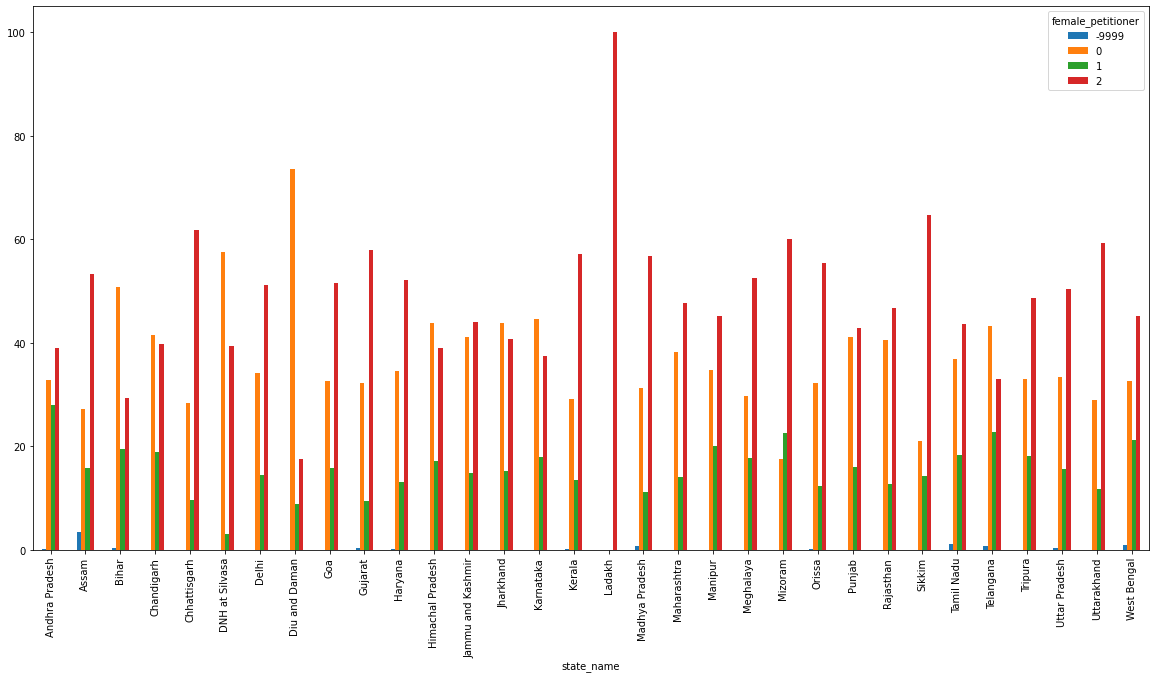

In [158]:
f_pet.plot.bar(figsize=(20,10))

In [159]:
#female_adv_pet=pd.crosstab(df.state_name,df.female_adv_pet)
#print(female_adv_pet)
#percentage Value 
f_adv_pet=pd.crosstab(df.state_name,df.female_adv_pet).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
print(f_adv_pet)

female_adv_pet     -9999      0       1      2
state_name                                    
Andhra Pradesh     16.47  56.80    5.08  21.65
Assam              58.38  24.25    3.31  14.05
Bihar              43.42  43.32    8.80   4.46
Chandigarh         22.39  67.96    5.50   4.16
Chhattisgarh       63.49  27.24    2.72   6.55
DNH at Silvasa     15.15  45.45   12.12  27.27
Delhi              88.54   9.45    1.17   0.84
Diu and Daman       5.88  70.59    8.82  14.71
Goa                34.71  45.81    6.61  12.87
Gujarat            23.15  43.11    2.64  31.10
Haryana            20.70  63.19    2.67  13.44
Himachal Pradesh   51.74  39.77    1.36   7.13
Jammu and Kashmir  37.25  40.54   10.20  12.01
Jharkhand          40.20  51.45    2.13   6.23
Karnataka          38.30  42.11    6.00  13.59
Kerala             60.93  31.63    3.48   3.97
Ladakh              0.00   0.00  100.00   0.00
Madhya Pradesh     43.47  31.08    9.36  16.09
Maharashtra        19.85  55.97    4.52  19.66
Manipur      

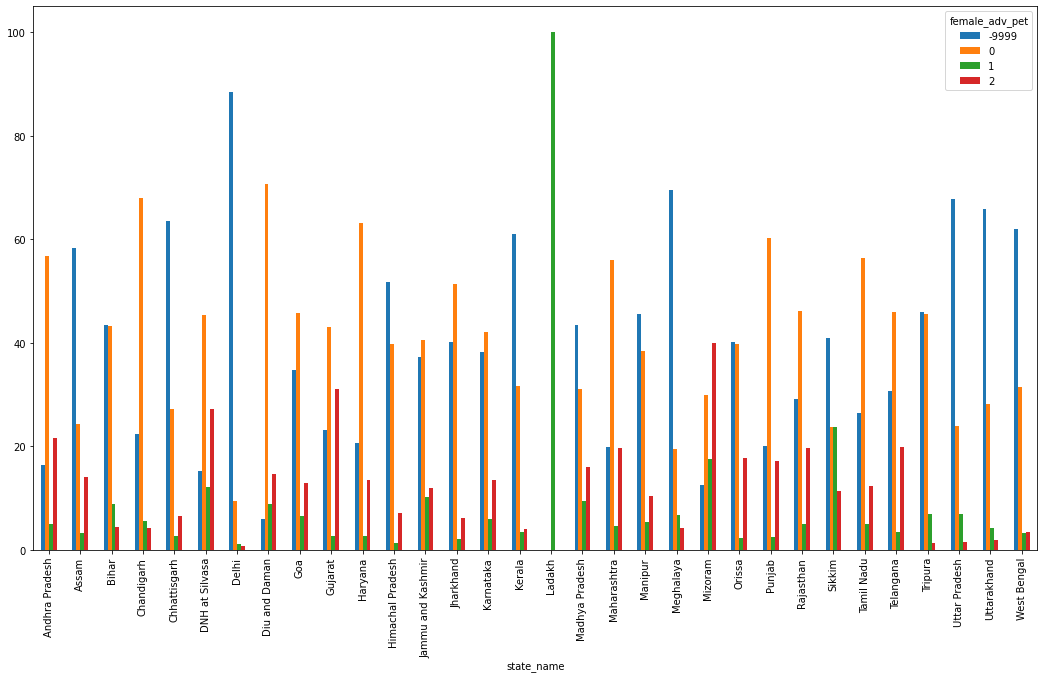

In [160]:
f_adv_pet.plot.bar(figsize=(18,10))

**OBSERVATIONS :**



> 








> Statewise number of cases against female is very low compare to male.** Mizoram** followed by** AP,Meghalaya** and **Telangana** have more cases against female.

>Number of cases filed by female is low compare to male.	

>**AP**, **Telangana,Mizoram, Meghalaya,Manipur** and** Tripura** have more awareness about laws in female community as per female_petitioner data.

>Number of female advocate is very less in Indian judicial system, it shows a **very widespread gender bias**.

> **Mizoram** has least gender bais.





# Decision time analysis

In [183]:
df['decision_diff']=df['date_of_decision']-df['date_of_filing']
df['first_list_diff']=df['date_first_list']-df['date_of_filing']

In [184]:
df['decision_diff_bucket']=np.where(df['decision_diff']<'30 days', 'a.[0-30)', 
                                             np.where(df['decision_diff']<'90 days', 'b.[30-90)',  
                                                  np.where(df['decision_diff']<'180 days', 'c.[90-180)', 
                                                           np.where(df['decision_diff']<'365 days', 'd.[180-365)', 
                                                                    np.where(df['decision_diff']<'1095 days', 'e.[365-1095)',
                                                                             np.where(df['decision_diff']>='1095 days', 'f.[1095+)',
                                                                                      "NA"
                                              
                                              
                                              
                                              ))))))

In [185]:
df['first_list_diff_bucket']=np.where(df['first_list_diff']<'30 days', 'a.[0-30)', 
                                             np.where(df['first_list_diff']<'90 days', 'b.[30-90)',  
                                                  np.where(df['first_list_diff']<'180 days', 'c.[90-180)', 
                                                           np.where(df['first_list_diff']<'365 days', 'd.[180-365)', 
                                                                    np.where(df['first_list_diff']<'1095 days', 'e.[365-1095)',
                                                                             np.where(df['first_list_diff']>='1095 days', 'f.[1095+)',
                                                                                      "NA"
                                              
                                              
                                              
                                              ))))))

In [186]:
desc_y=pd.crosstab(df.year,df.decision_diff_bucket).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
desc_y

decision_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
year,,,,,,,
2010,14.06,7.38,3.38,3.77,7.09,25.87,38.45
2011,13.18,9.30,4.25,4.82,9.60,27.15,31.70
2012,13.67,11.04,5.60,6.12,9.89,28.24,25.45
2013,15.84,14.79,6.97,6.94,11.14,27.10,17.22
2014,18.21,18.79,8.07,7.28,11.81,24.53,11.31
2015,21.59,21.95,8.65,7.62,11.16,23.16,5.88
2016,28.89,23.06,8.65,7.44,11.26,20.14,0.56
2017,35.38,27.06,8.94,7.58,10.58,10.39,0.06
2018,47.20,30.04,8.40,5.80,5.78,2.78,0.00


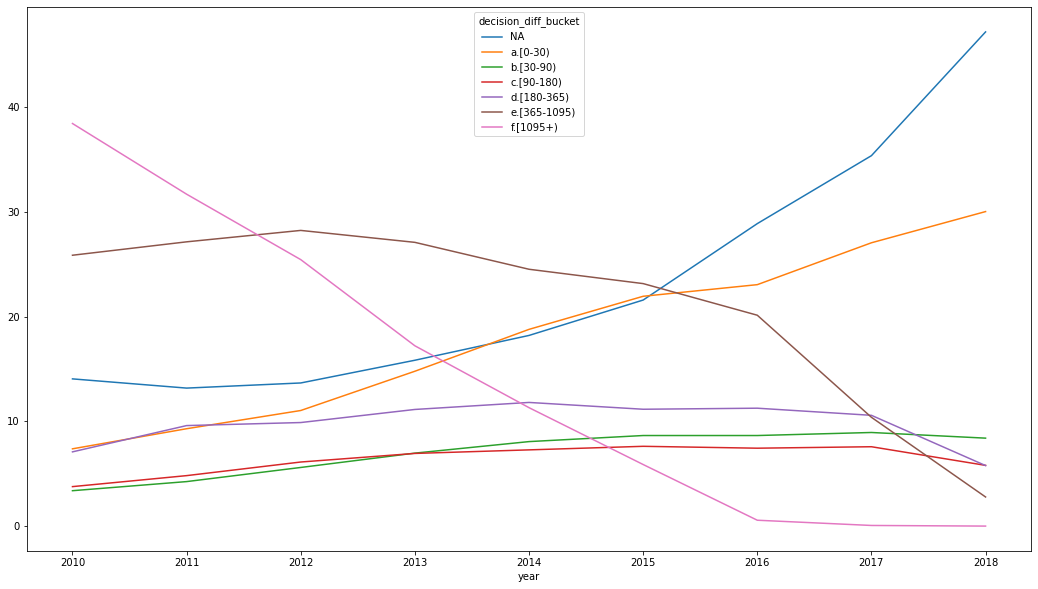

In [187]:
desc_y.plot.line(figsize=(18,10))

In [188]:
#decs_s=pd.crosstab(df.state_name,df.decision_diff_bucket)
#percentage Value
decs_s=pd.crosstab(df.state_name,df.decision_diff_bucket).apply(lambda row:row/row.sum()*100,axis=1).round(decimals=2)
decs_s

decision_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
state_name,,,,,,,
Andhra Pradesh,19.71,8.54,6.32,8.22,14.57,29.00,13.65
Assam,18.09,15.88,7.94,9.43,13.10,22.64,12.92
Bihar,53.37,12.63,5.28,3.26,3.97,10.14,11.35
Chandigarh,10.32,13.67,10.05,7.77,16.62,30.43,11.13
Chhattisgarh,21.10,33.09,5.50,5.28,8.51,14.81,11.71
DNH at Silvasa,0.00,21.21,18.18,9.09,12.12,27.27,12.12
Delhi,22.82,15.32,9.45,9.62,12.81,20.78,9.21
Diu and Daman,0.00,38.24,23.53,8.82,17.65,11.76,0.00
Goa,12.99,21.37,12.51,12.63,15.23,20.31,4.96


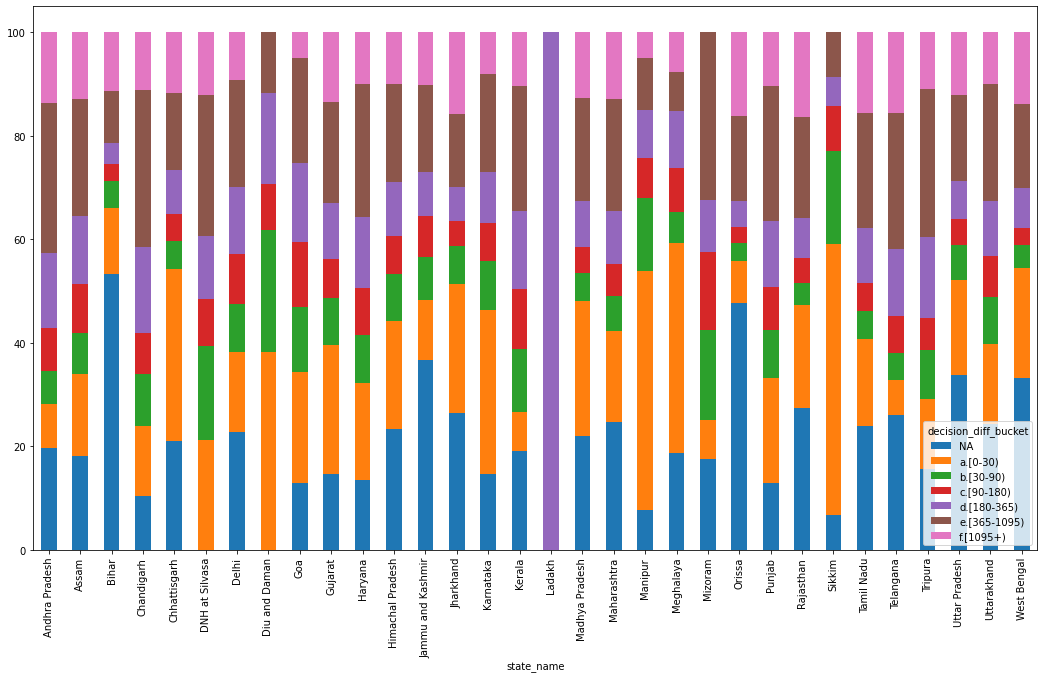

In [189]:
decs_s.plot.bar(figsize=(18,10),stacked=True)

In [190]:
#decs_f_d=pd.crosstab(df.decision_diff_bucket,df.female_defendant)
# % value
decs_f_d=pd.crosstab(df.female_defendant,df.decision_diff_bucket).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
decs_f_d

decision_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
female_defendant,,,,,,,
-9999,16.27,29.93,7.88,7.95,10.77,16.56,10.63
0,27.03,16.35,6.71,6.40,9.77,20.78,12.95
1,25.14,12.50,6.73,7.09,12.27,23.38,12.88
2,16.50,32.93,9.68,6.78,8.92,16.09,9.10


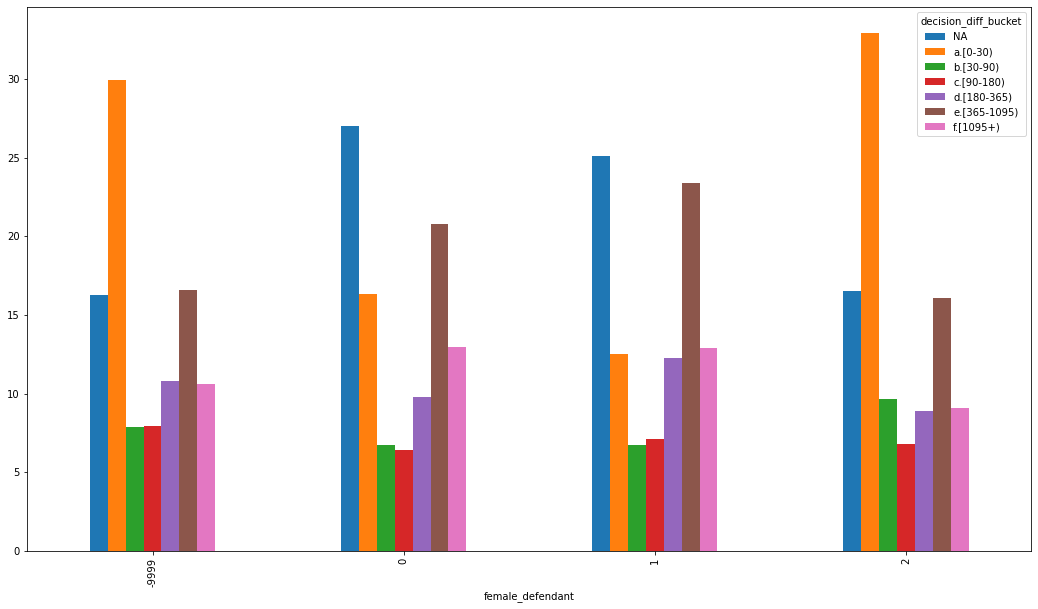

In [191]:
decs_f_d.plot.bar(figsize=(18,10))

In [192]:
#desc_f_adv_d=pd.crosstab(df.decision_diff_bucket,df.female_adv_def)
# % value
desc_f_adv_d=pd.crosstab(df.female_adv_def,df.decision_diff_bucket).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
desc_f_adv_d

decision_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
female_adv_def,,,,,,,
-9999,25.11,19.94,7.91,7.05,10.28,19.33,10.38
0,22.33,15.79,4.20,3.95,7.66,24.27,21.80
1,23.87,9.75,3.38,4.02,9.36,27.32,22.31
2,16.64,24.27,5.50,4.92,8.94,21.97,17.77


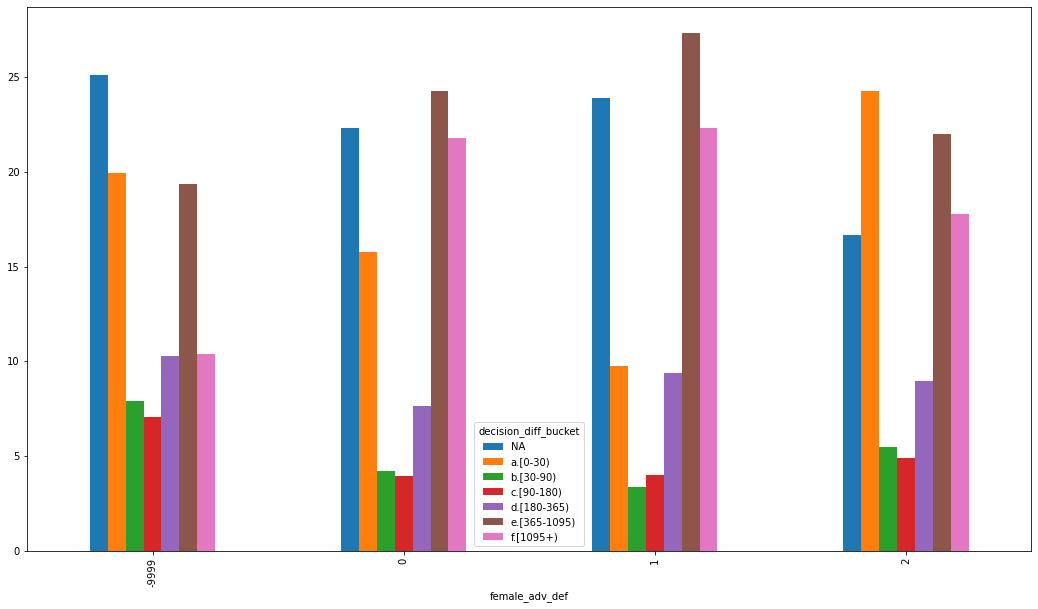

In [193]:
desc_f_adv_d.plot.bar(figsize=(18,10))

In [194]:
#decs_f_p=pd.crosstab(df.decision_diff_bucket,df.female_petitioner)
# % value
decs_f_p=pd.crosstab(df.female_petitioner,df.decision_diff_bucket).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
decs_f_p

decision_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
female_petitioner,,,,,,,
-9999,18.79,41.69,5.01,4.56,6.38,13.67,9.91
0,23.07,18.67,7.19,6.37,10.30,21.47,12.94
1,25.45,10.81,6.74,6.97,12.43,24.22,13.39
2,25.50,22.51,7.64,6.61,8.82,17.79,11.13


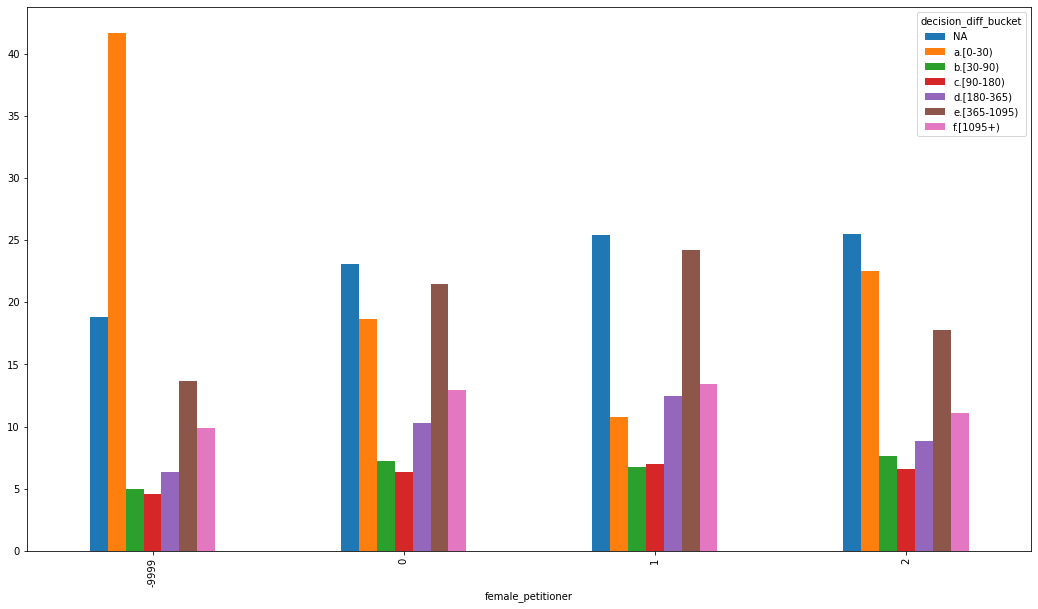

In [195]:
decs_f_p.plot.bar(figsize=(18,10))

In [196]:
#decs_f_adv_p=pd.crosstab(df.decision_diff_bucket,df.female_adv_pet)
# % value
decs_f_adv_p=pd.crosstab(df.female_adv_pet,df.decision_diff_bucket).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
decs_f_adv_p

decision_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
female_adv_pet,,,,,,,
-9999,24.43,21.08,7.65,6.80,9.46,18.60,11.99
0,23.93,16.97,7.22,6.63,10.83,22.16,12.27
1,30.89,17.90,6.48,5.56,9.49,17.92,11.76
2,24.69,22.19,6.99,6.05,8.52,19.23,12.34


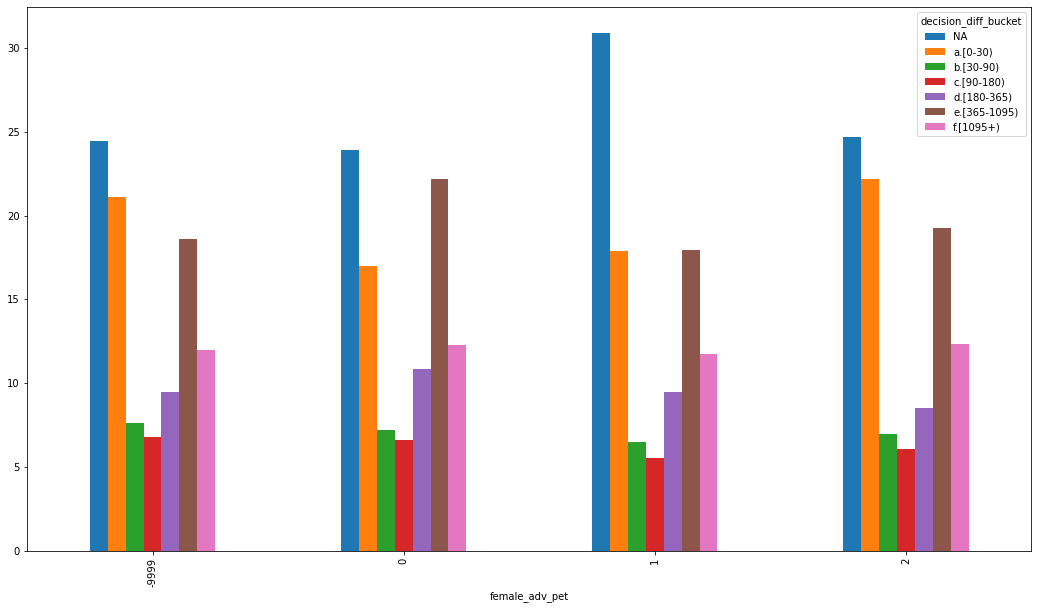

In [197]:
decs_f_adv_p.plot.bar(figsize=(18,10))

In [198]:
f_l=pd.crosstab(df.year,df.first_list_diff_bucket).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
f_l

first_list_diff_bucket,NA,a.[0-30),b.[30-90),c.[90-180),d.[180-365),e.[365-1095),f.[1095+)
year,,,,,,,
2010,4.59,18.77,11.02,7.21,9.01,31.83,17.57
2011,3.77,22.39,16.52,10.44,11.90,25.47,9.51
2012,3.38,28.84,21.92,11.72,12.53,15.80,5.82
2013,2.73,37.49,24.81,11.77,8.77,10.52,3.92
2014,1.99,45.55,25.83,10.14,6.76,6.68,3.05
2015,1.32,52.04,26.42,9.02,4.81,5.08,1.31
2016,1.26,55.27,25.95,8.35,4.35,4.72,0.10
2017,1.56,60.47,24.82,7.72,3.48,1.96,0.00
2018,1.17,66.26,23.44,6.41,2.33,0.38,0.00


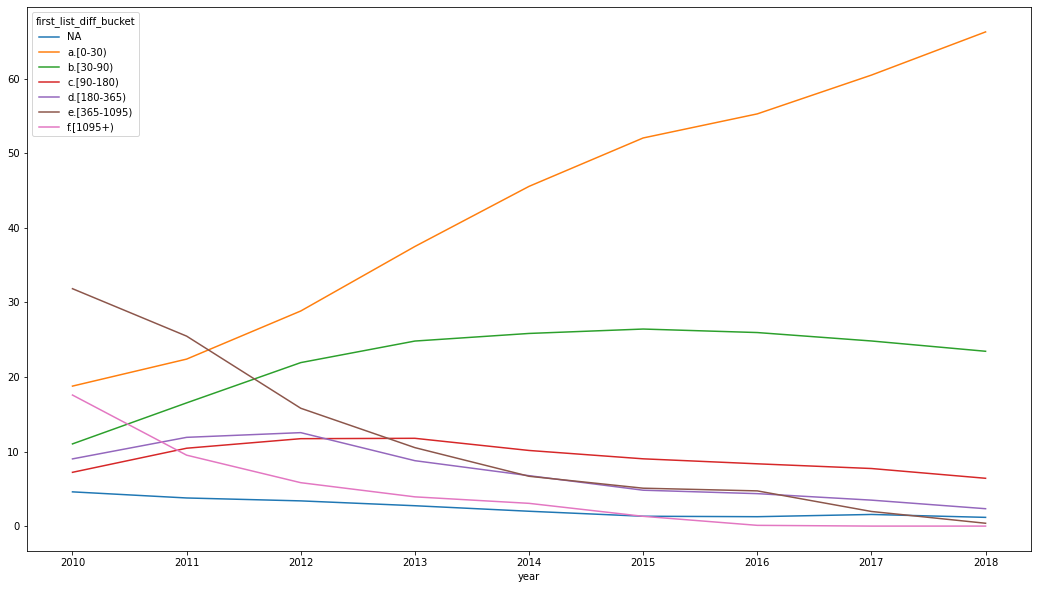

In [199]:
f_l.plot.line(figsize=(18,10))

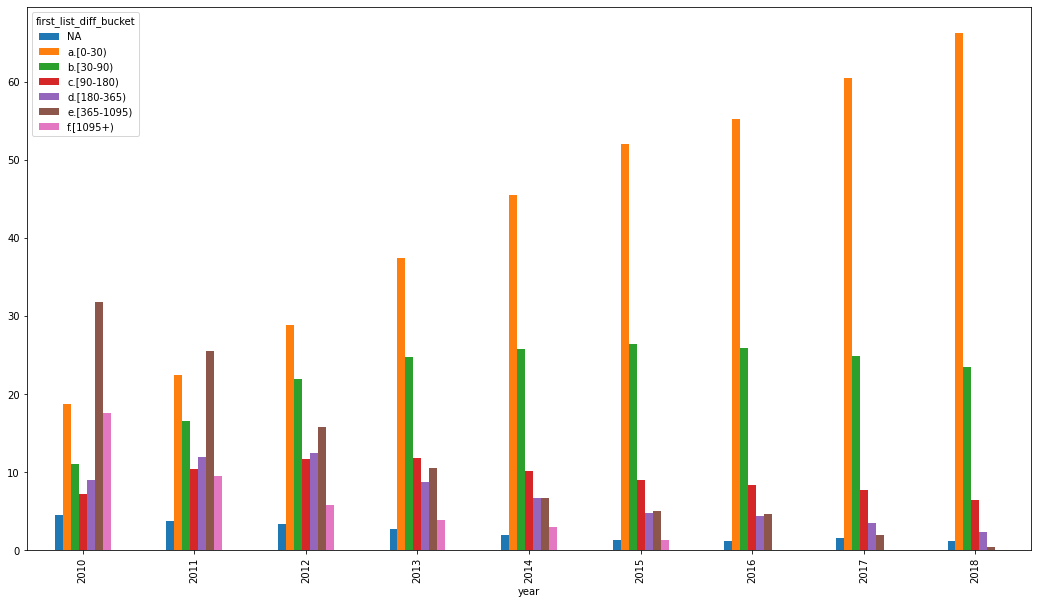

In [200]:
f_l.plot.bar(figsize=(18,10))

**OBSERVATIONS :**


> In recent times decision for short cases came very quickly and the number of cases whose decision is pending are increasing per year.

>**Bihar(53%) and Orissa(47%)** having the highest pending cases from 2010-2018 thus can be considered worst in terms of decision time.

>Decision for cases where defendant is female and advocate of defendant is also female are more likely to be declare within **1-3 year.**

>If petitioner is female or advocate of petitioner is female,**(~ 36%)** cases take 1 year for declaration of decision.

> In recent years first listing of case is much faster within 30 days as in **2016(55%)**, **2017(60%)** and **2018(66%)** of the cases get there first listing in comapre to only **(18-28)% in 2010-12**





# Interesting findings:

In [201]:
fin_1=pd.crosstab(df.female_defendant,df.female_adv_def).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
fin_1

female_adv_def,-9999,0,1,2
female_defendant,,,,
-9999,98.55,1.08,0.22,0.14
0,84.69,12.78,1.09,1.44
1,84.57,12.49,1.28,1.66
2,81.22,14.37,0.97,3.44


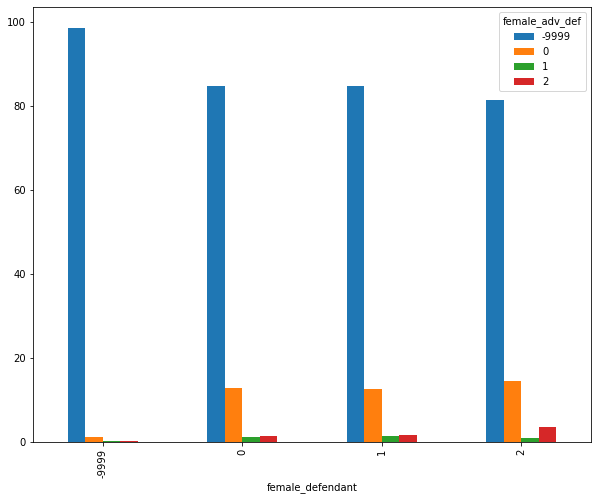

In [206]:
fin_1.plot.bar(figsize=(10,8))

Here , we can see the gender-bais based on defendant and advocate of defendant

*   Male defendant are more likely to choose male advocate
*   But, female defendant are also more likely to choose male advocate 



In [203]:
fin_2=pd.crosstab(df.female_petitioner,df.female_adv_pet).apply(lambda r:r/r.sum()*100,axis=1).round(decimals=2)
fin_2

female_adv_pet,-9999,0,1,2
female_petitioner,,,,
-9999,87.36,7.29,1.59,3.76
0,33.63,55.64,4.67,6.06
1,34.47,54.36,5.14,6.04
2,48.95,25.96,5.23,19.86


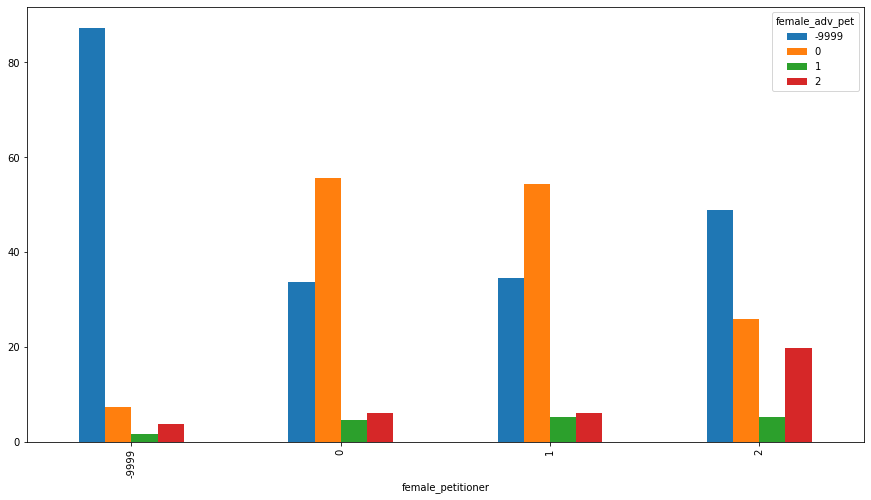

In [204]:
fin_2.plot.bar(figsize=(15,8))

Here , we can see the gender-bais based on defendant and advocate of defendant

*   Male petitioner is more likely to have male advocate(55%)


*   female petitioner is also more likely to have a male advocate(54%)




# Statewise sec act analysis:

Due to Unavailability of colab pro to open the acts_sections.csv file (3.5+ gb), I was unable to analyse the dataset.